In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_image(image, title):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 8), dpi=600)
    ax = plt.subplot()
    #将x轴设置到顶端
    ax.xaxis.set_ticks_position('top')
    # plt.xticks(np.arange(0, image.shape[1], 1000))
    # plt.yticks(np.arange(0, image.shape[0], 1000))
    ax.set_xlim(0, image.shape[1])
    ax.set_ylim(image.shape[0], 0)
    plt.imshow(image)  
    plt.title(title)
    plt.show()

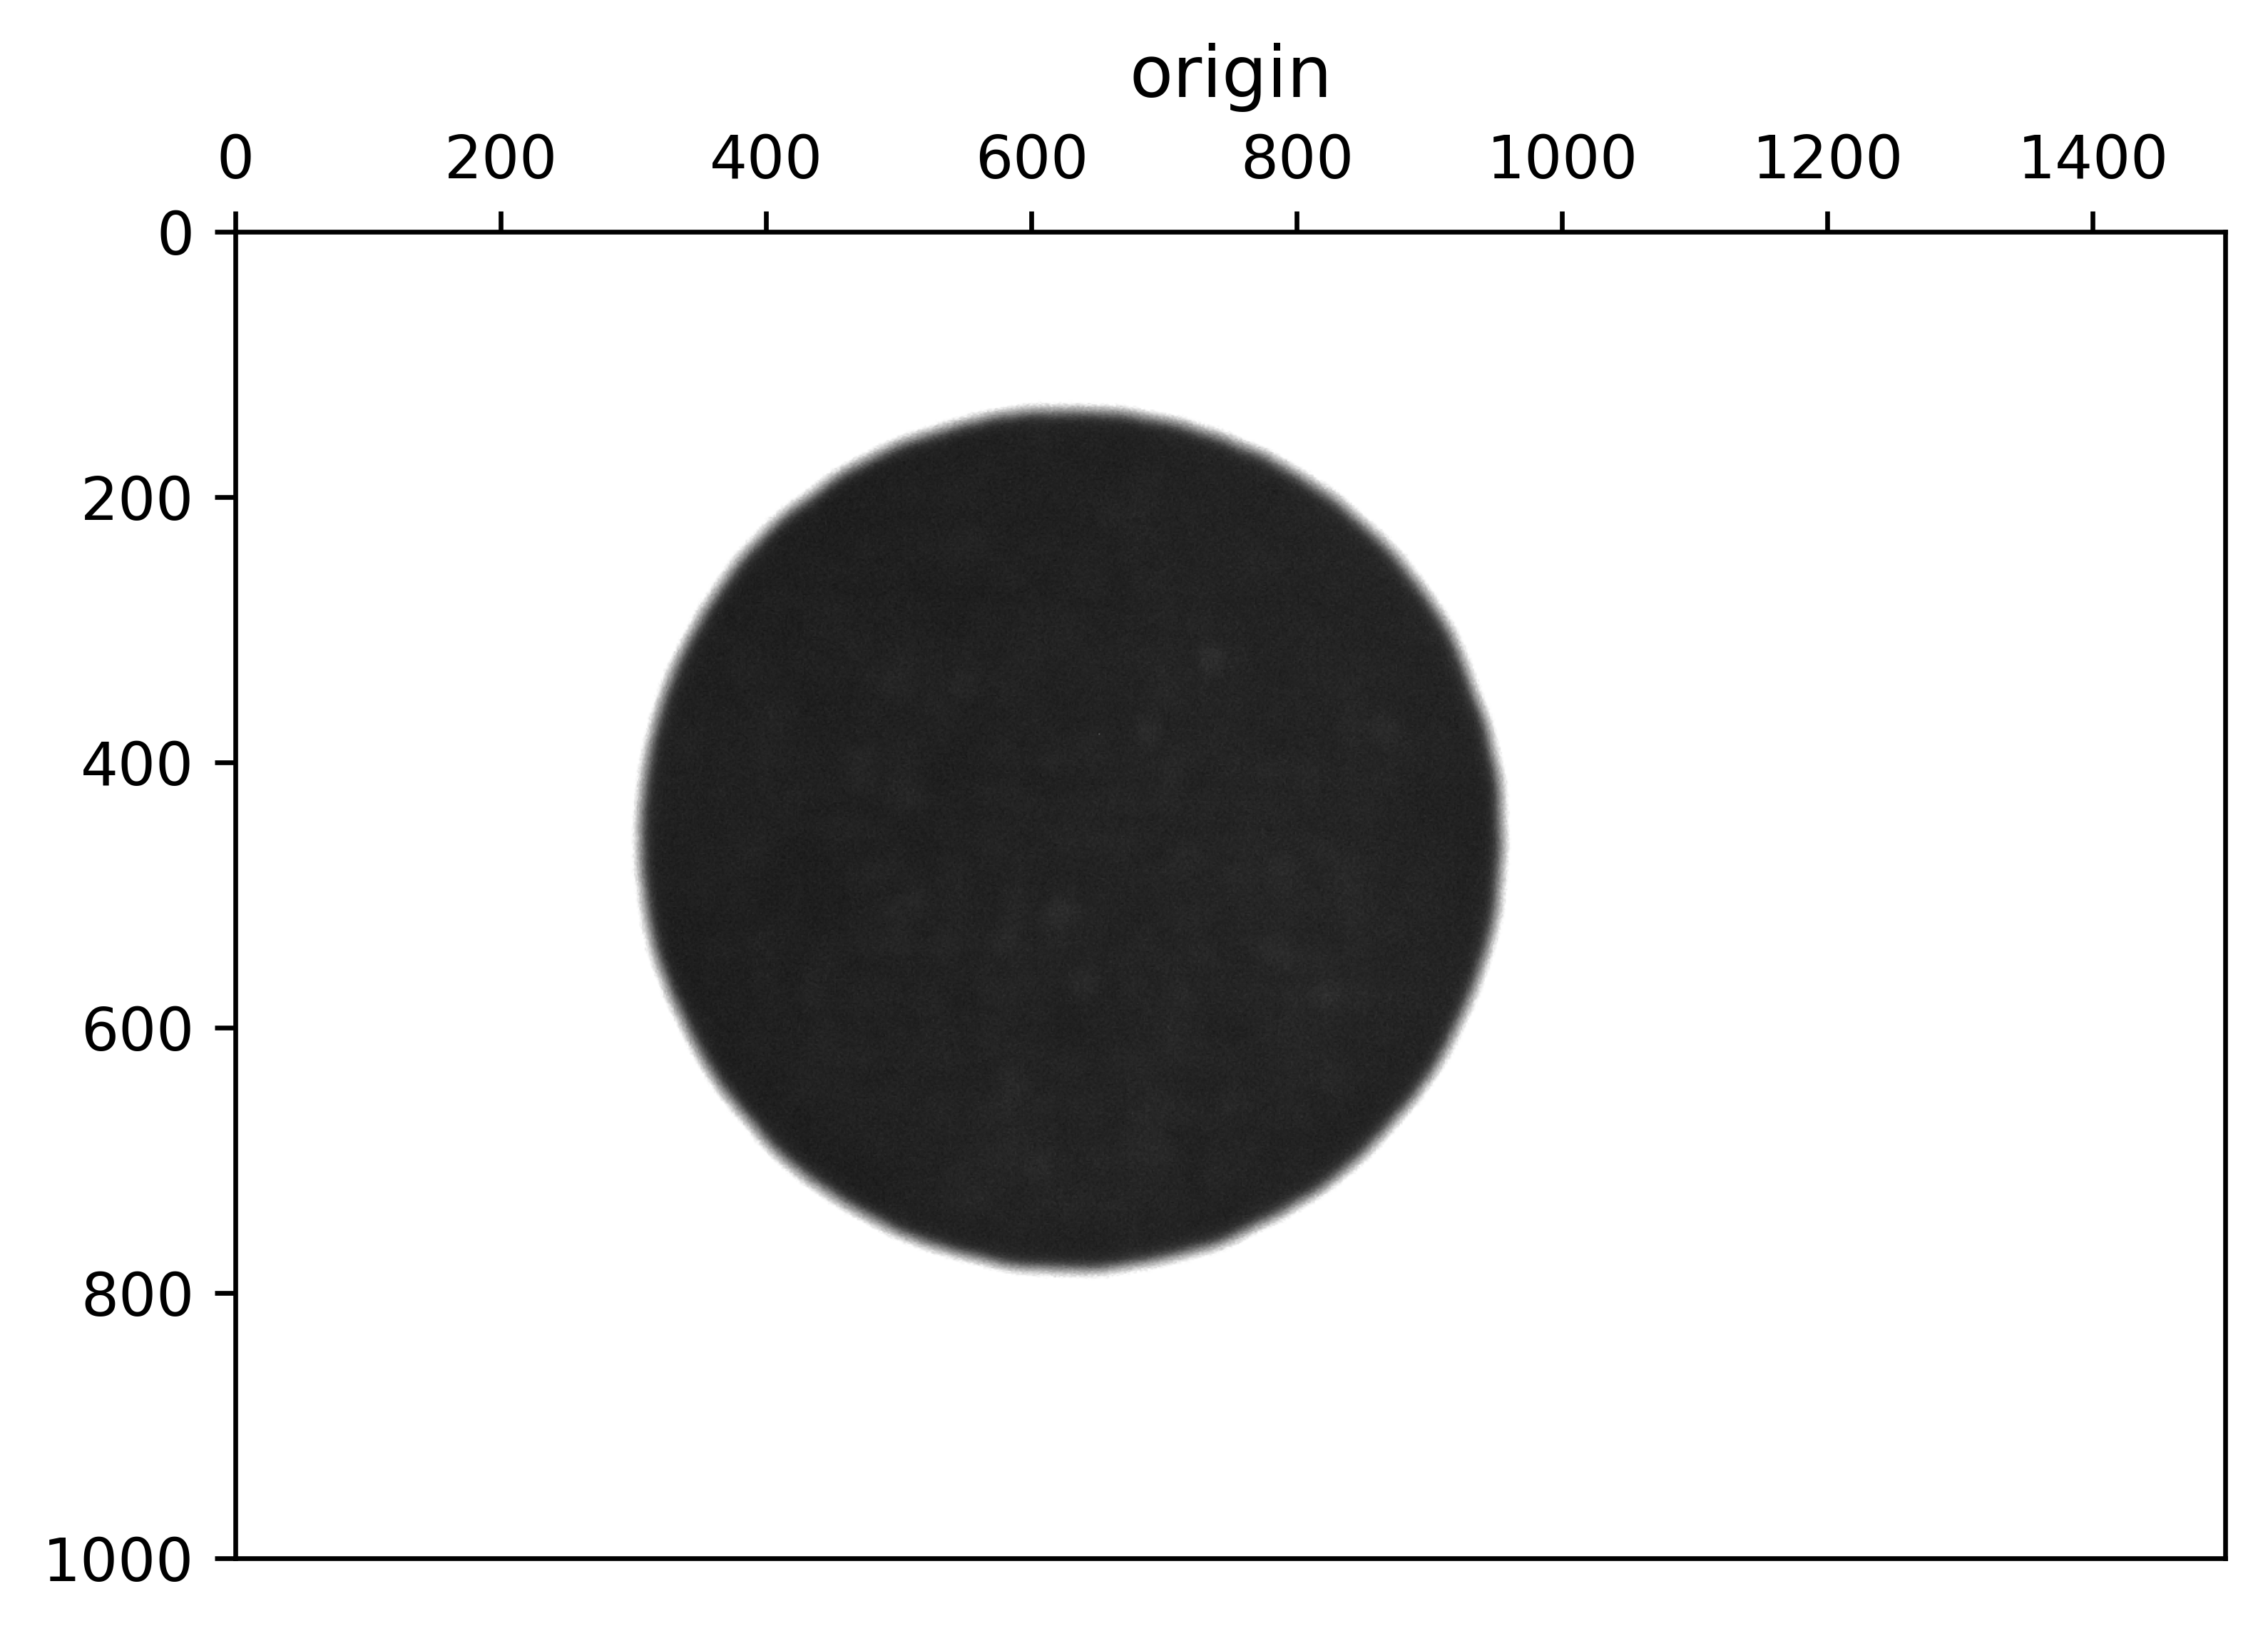

In [3]:
image_origin = cv2.imread("D:\BaiduNetdiskDownload\Image_20241104141307516.bmp", cv2.IMREAD_GRAYSCALE)
image = image_origin[1500:2500, 2000:3500]
show_image(image, "origin")

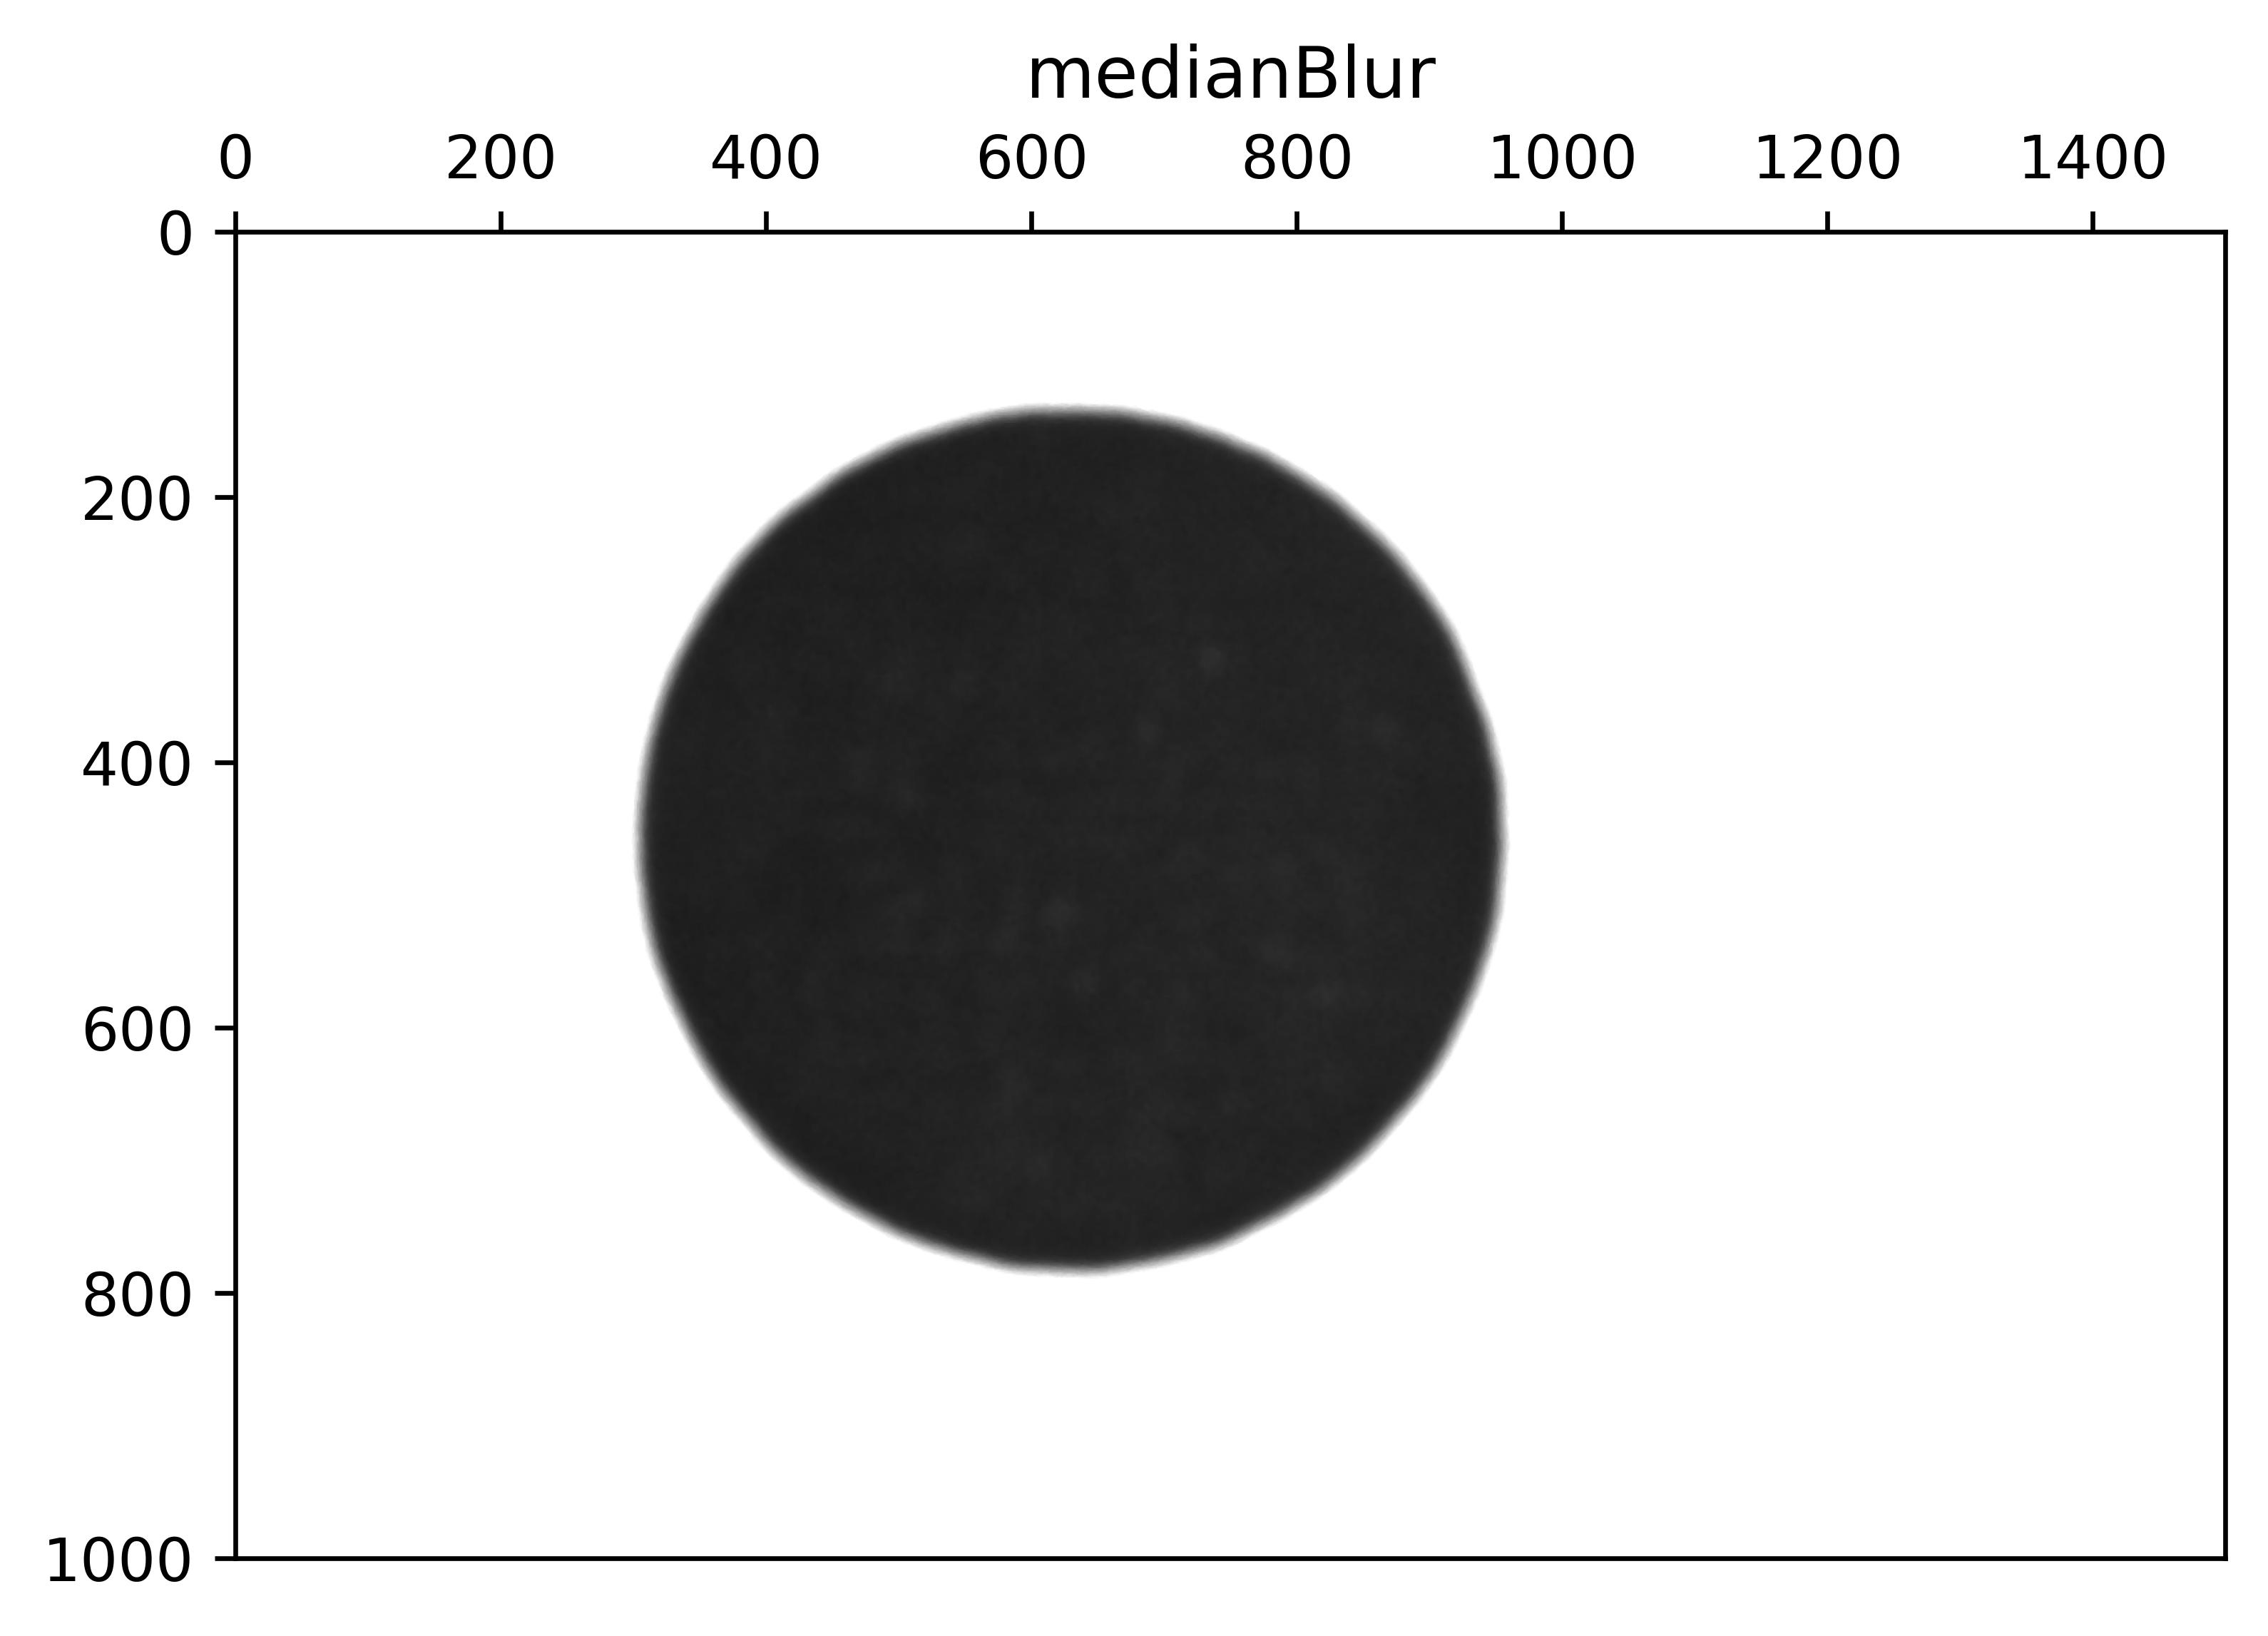

In [111]:
# 中值滤波
image = cv2.medianBlur(image, 5)
show_image(image, "medianBlur")

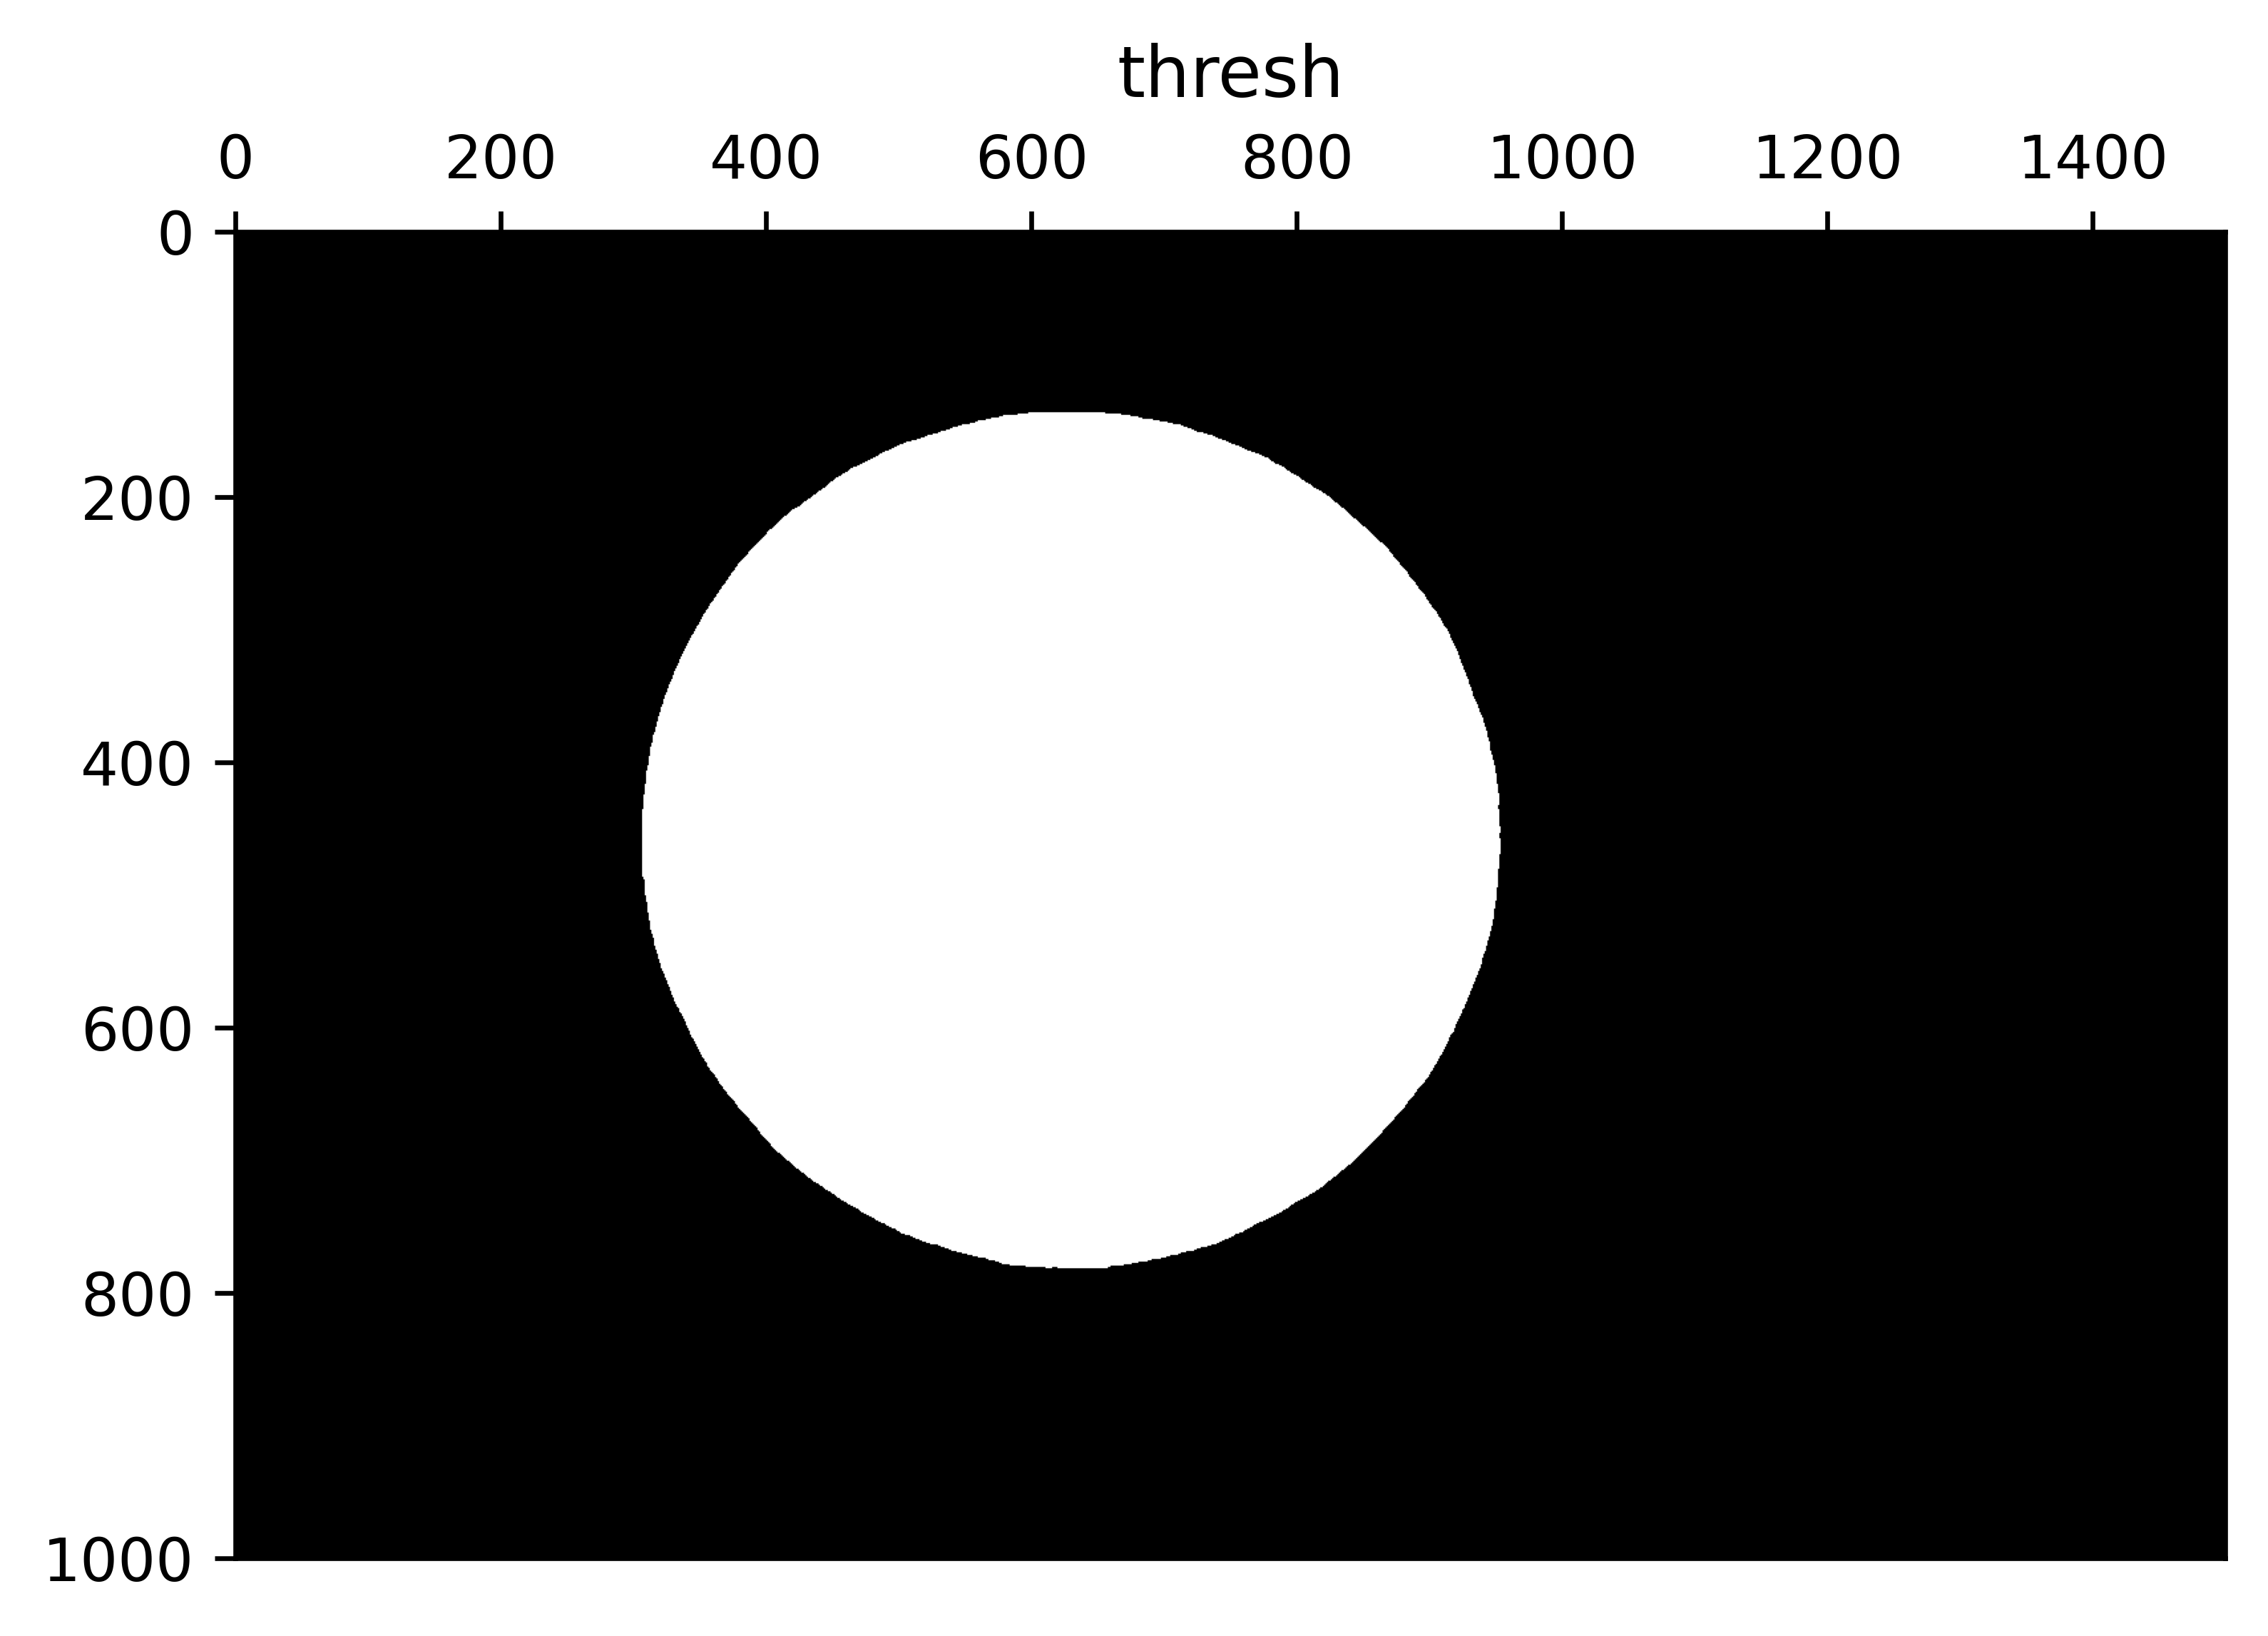

In [112]:
ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
show_image(thresh, "thresh")

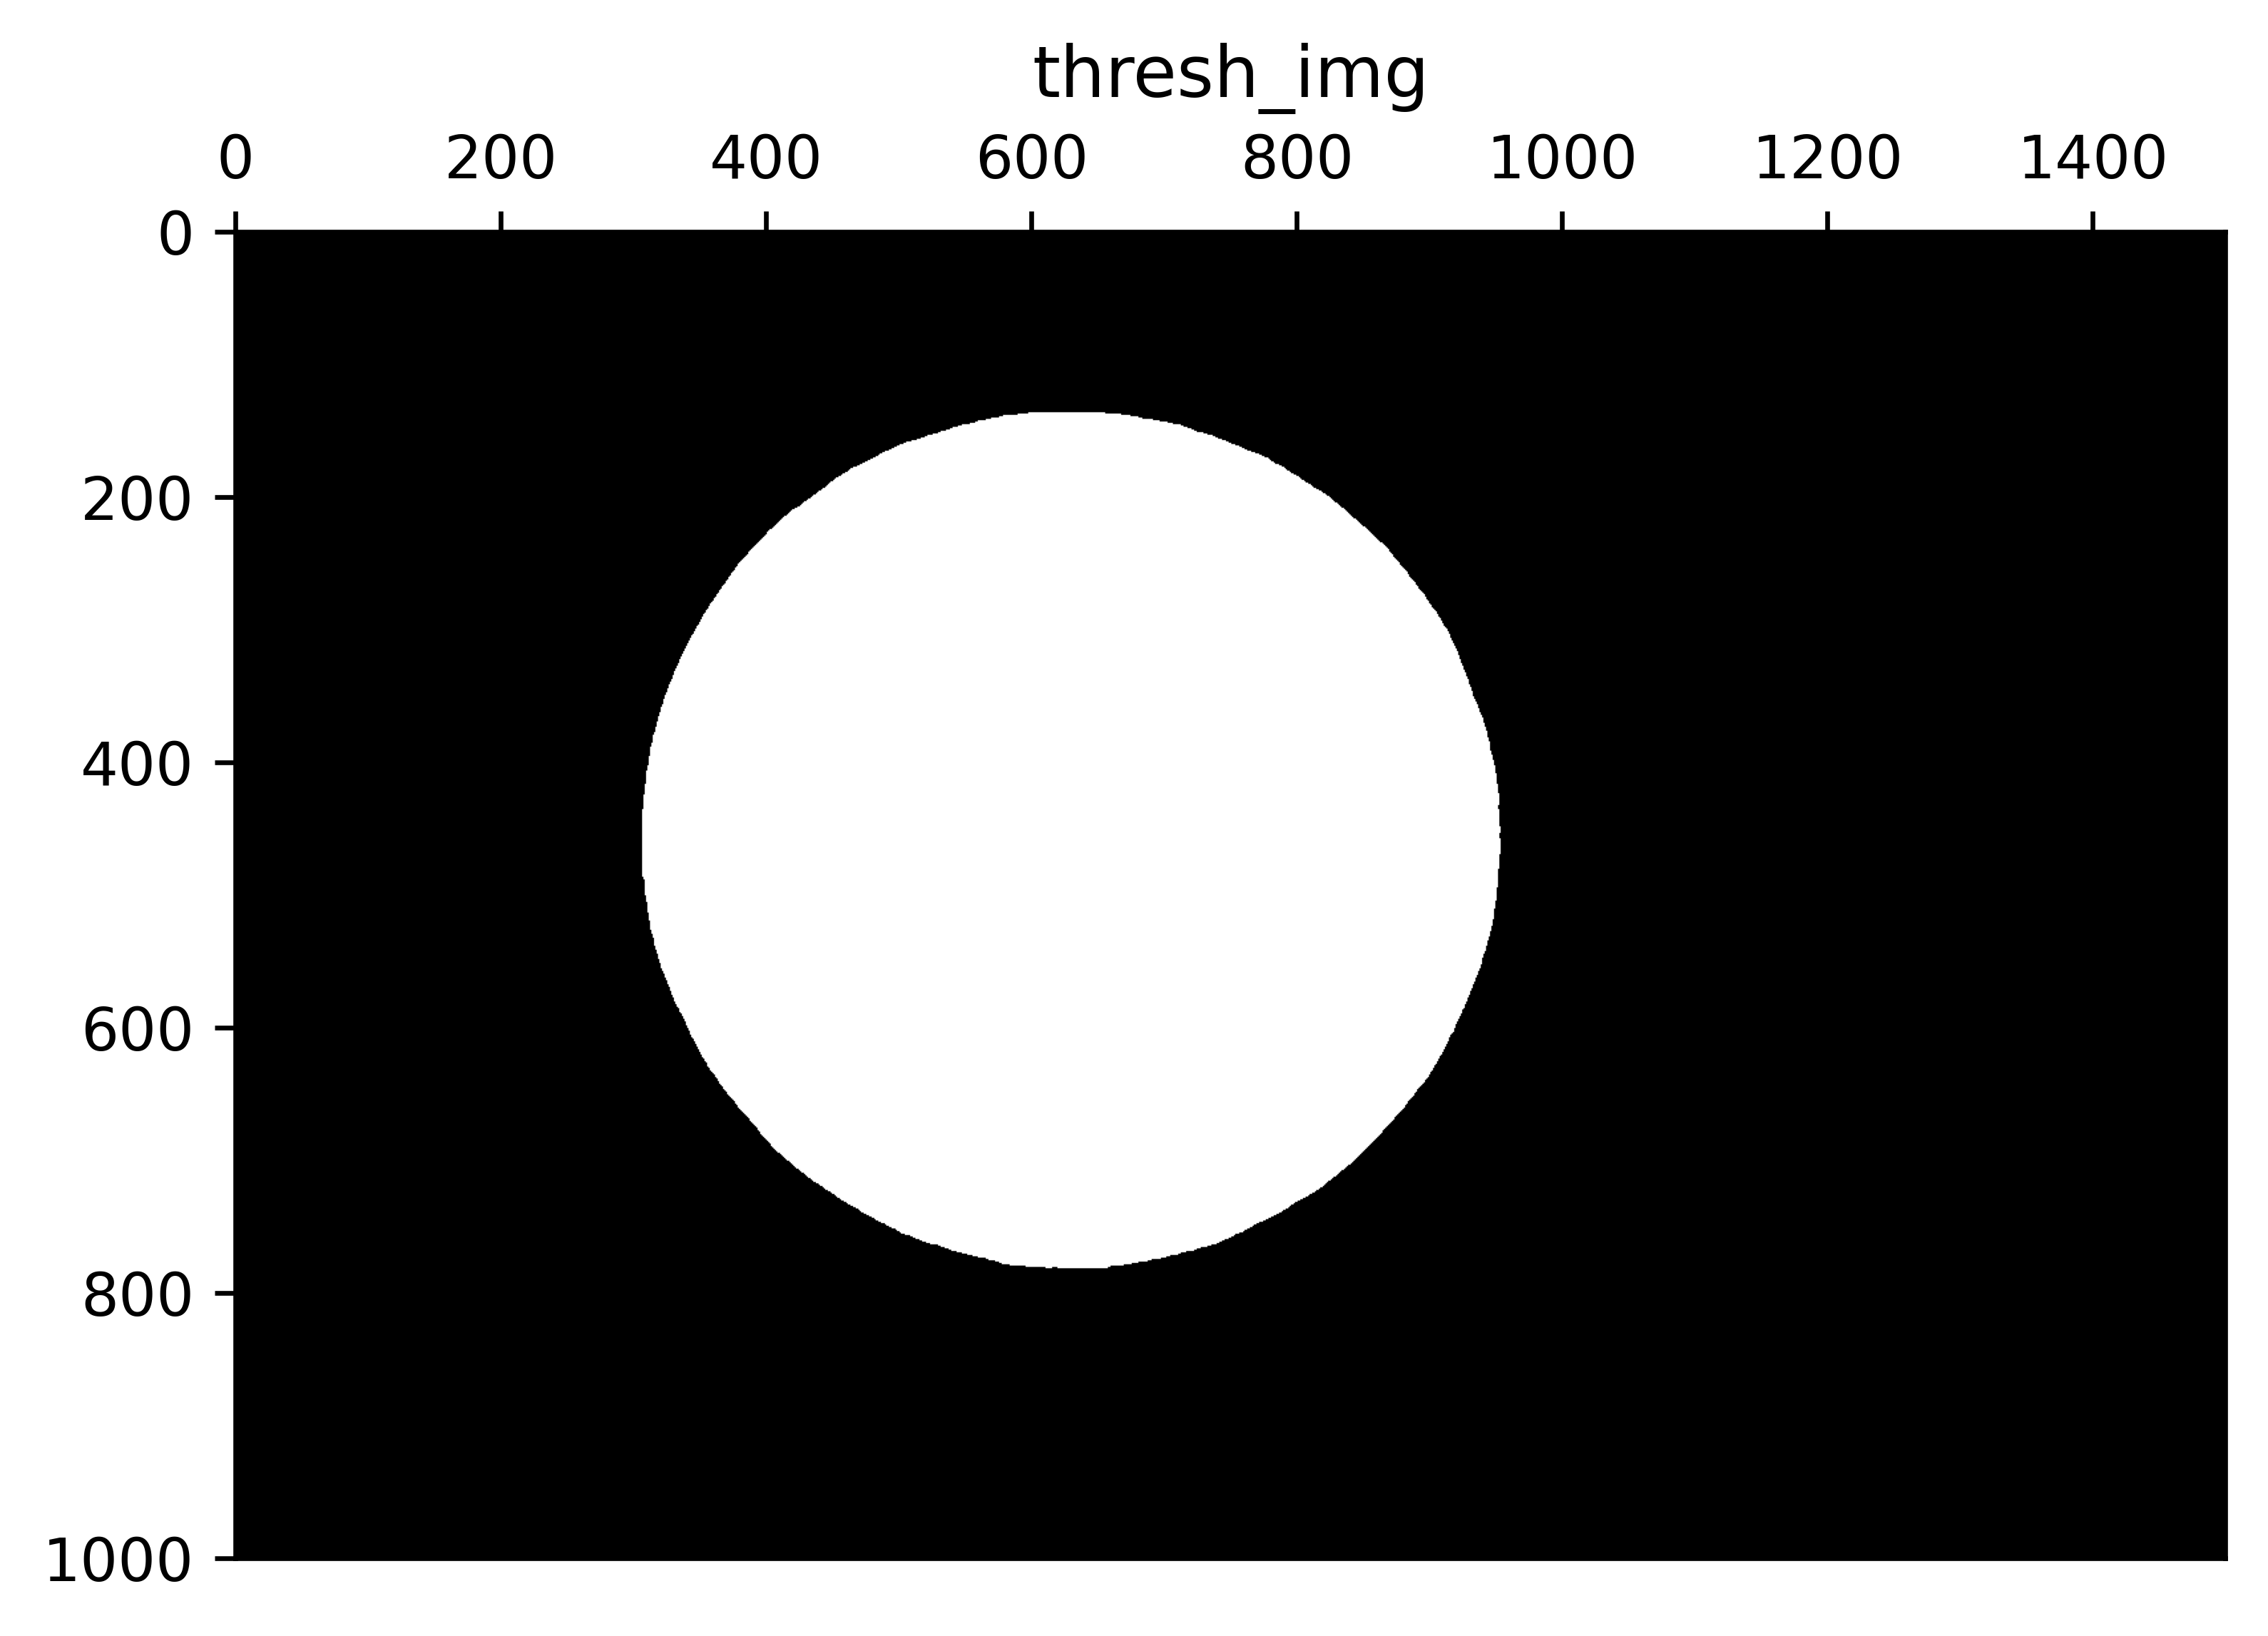

In [113]:
thresh_img = cv2.bilateralFilter(thresh, 9, 75, 75)
show_image(thresh_img, "thresh_img")
# 中值滤波
# thresh_img = cv2.medianBlur(thresh, 5)
# show_image(thresh_img, "thresh_img")

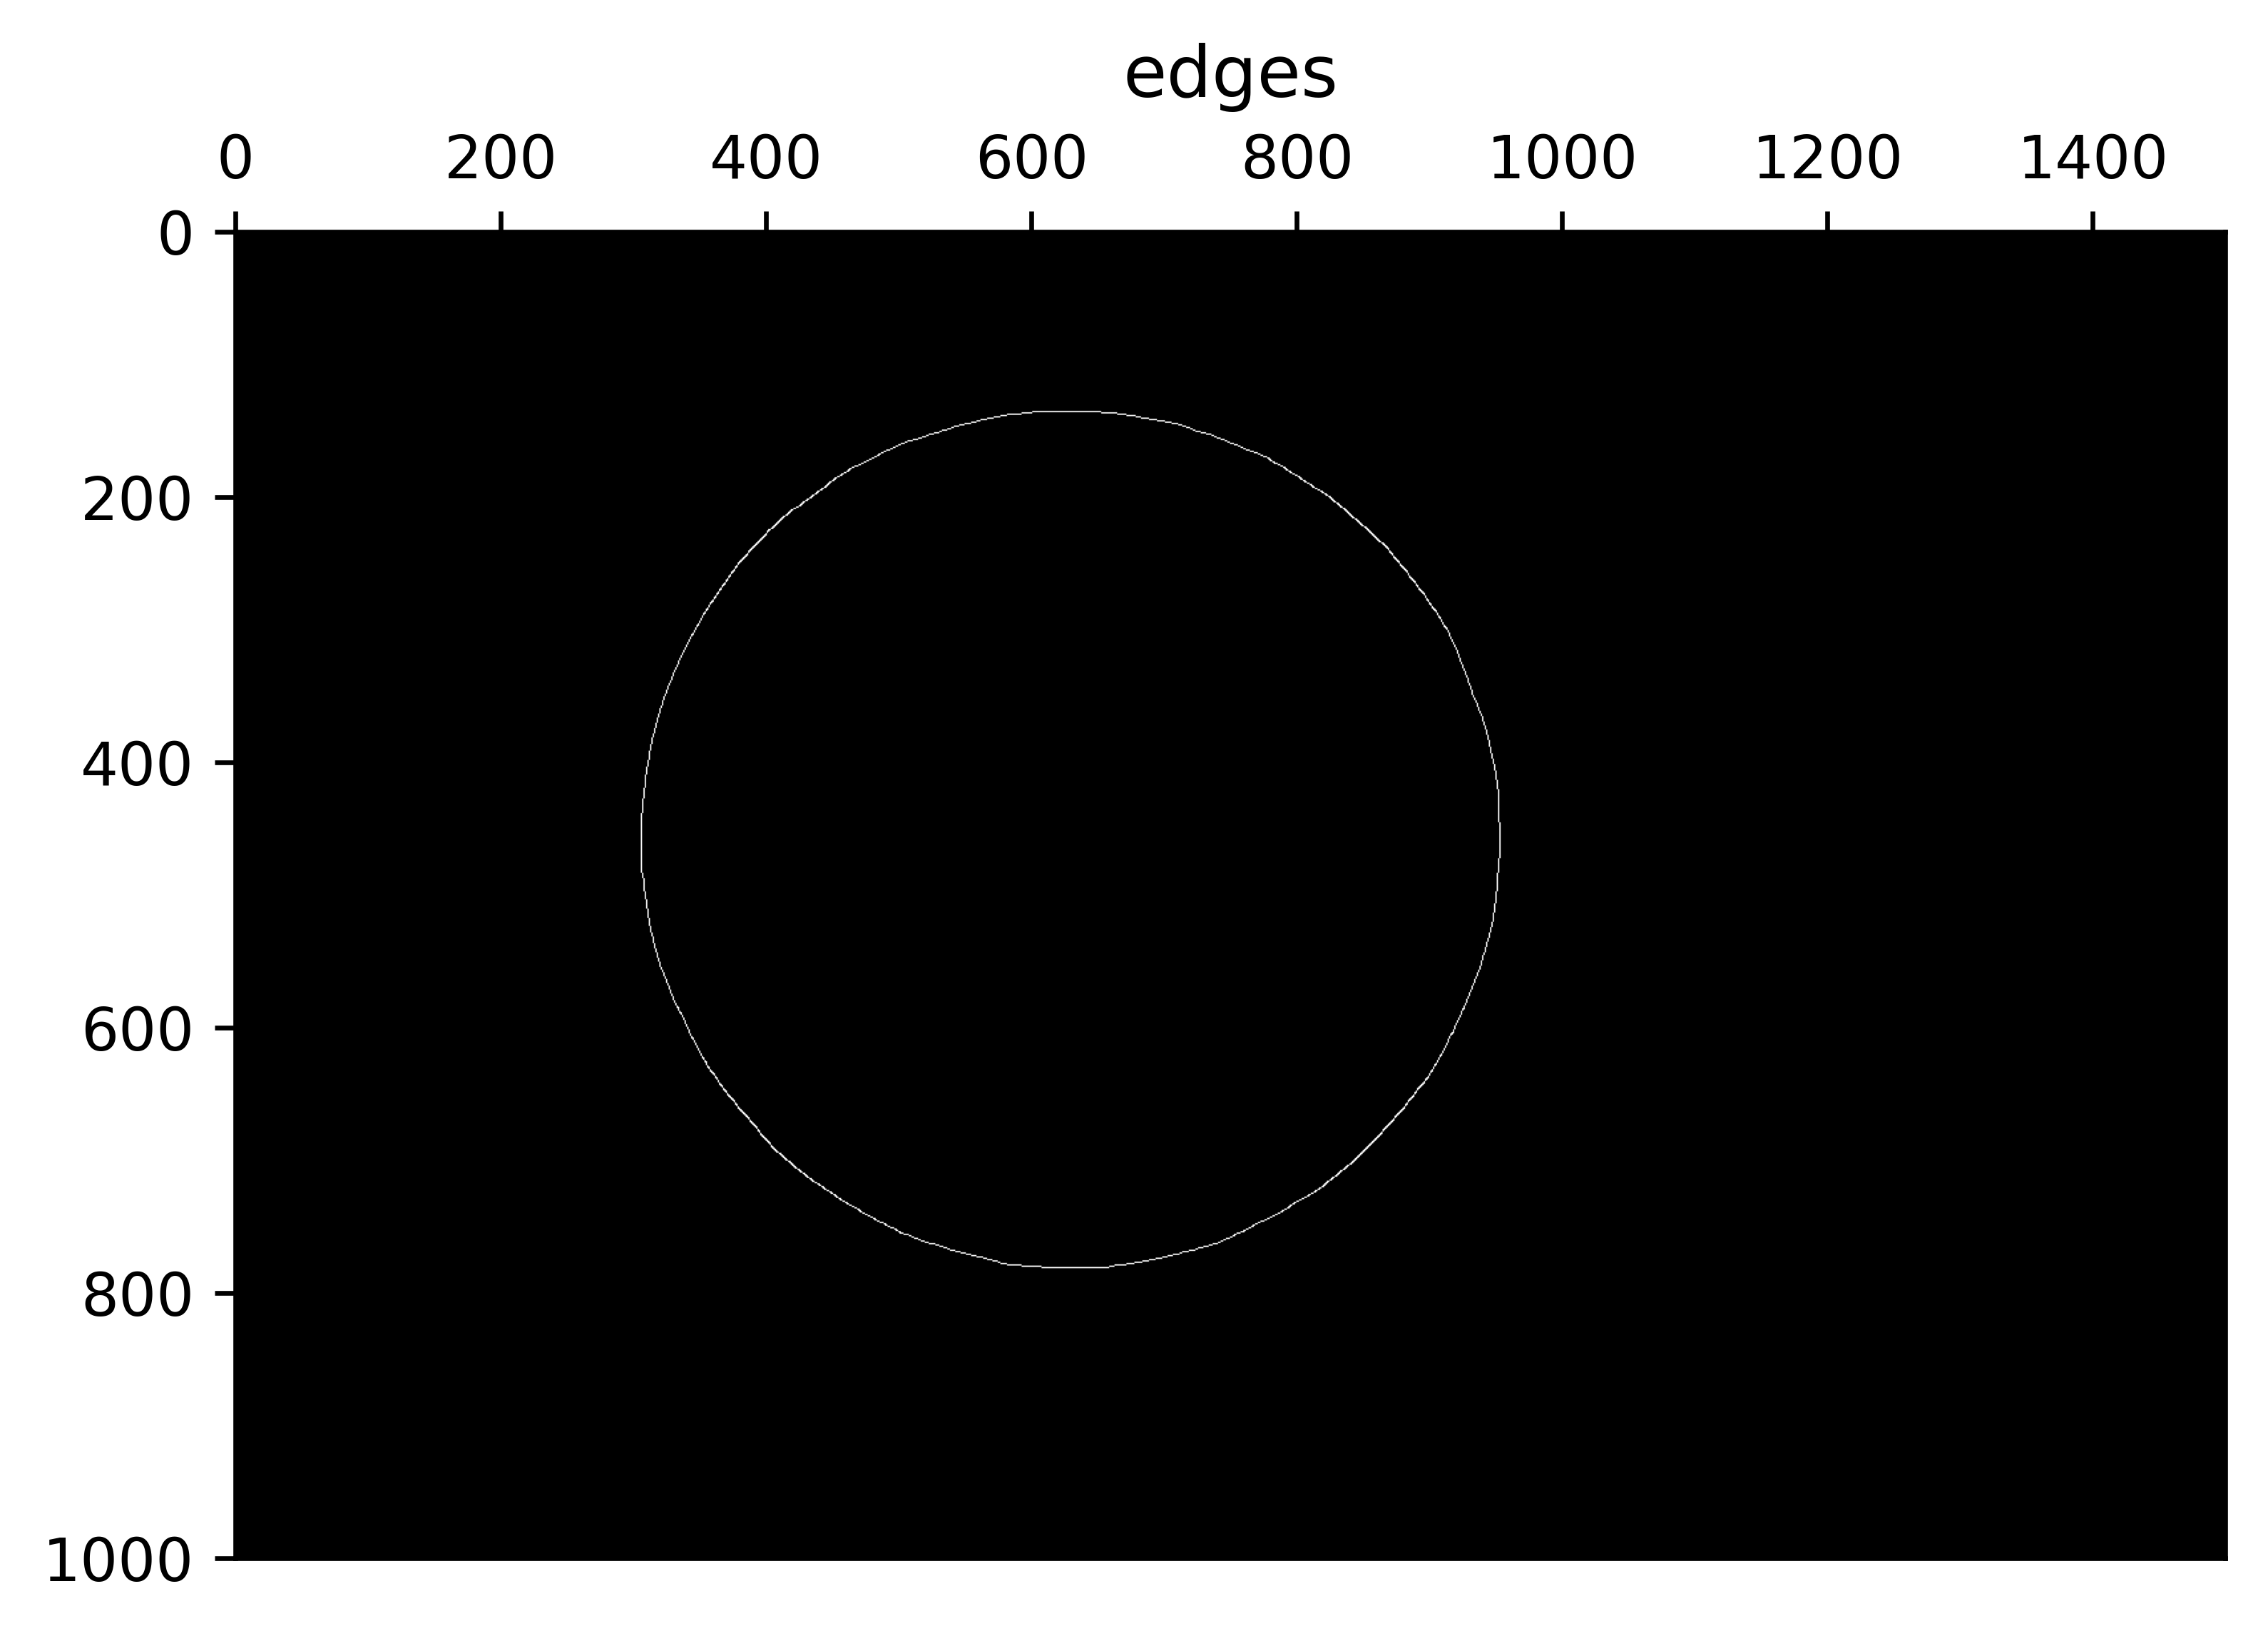

In [114]:
edges = cv2.Canny(thresh_img, 50, 150)
show_image(edges, "edges")

In [128]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1.1, 100, param1=100, param2=33, minRadius=300, maxRadius=400)

In [129]:
print(circles)

[[[627.55    458.15002 323.43   ]]]


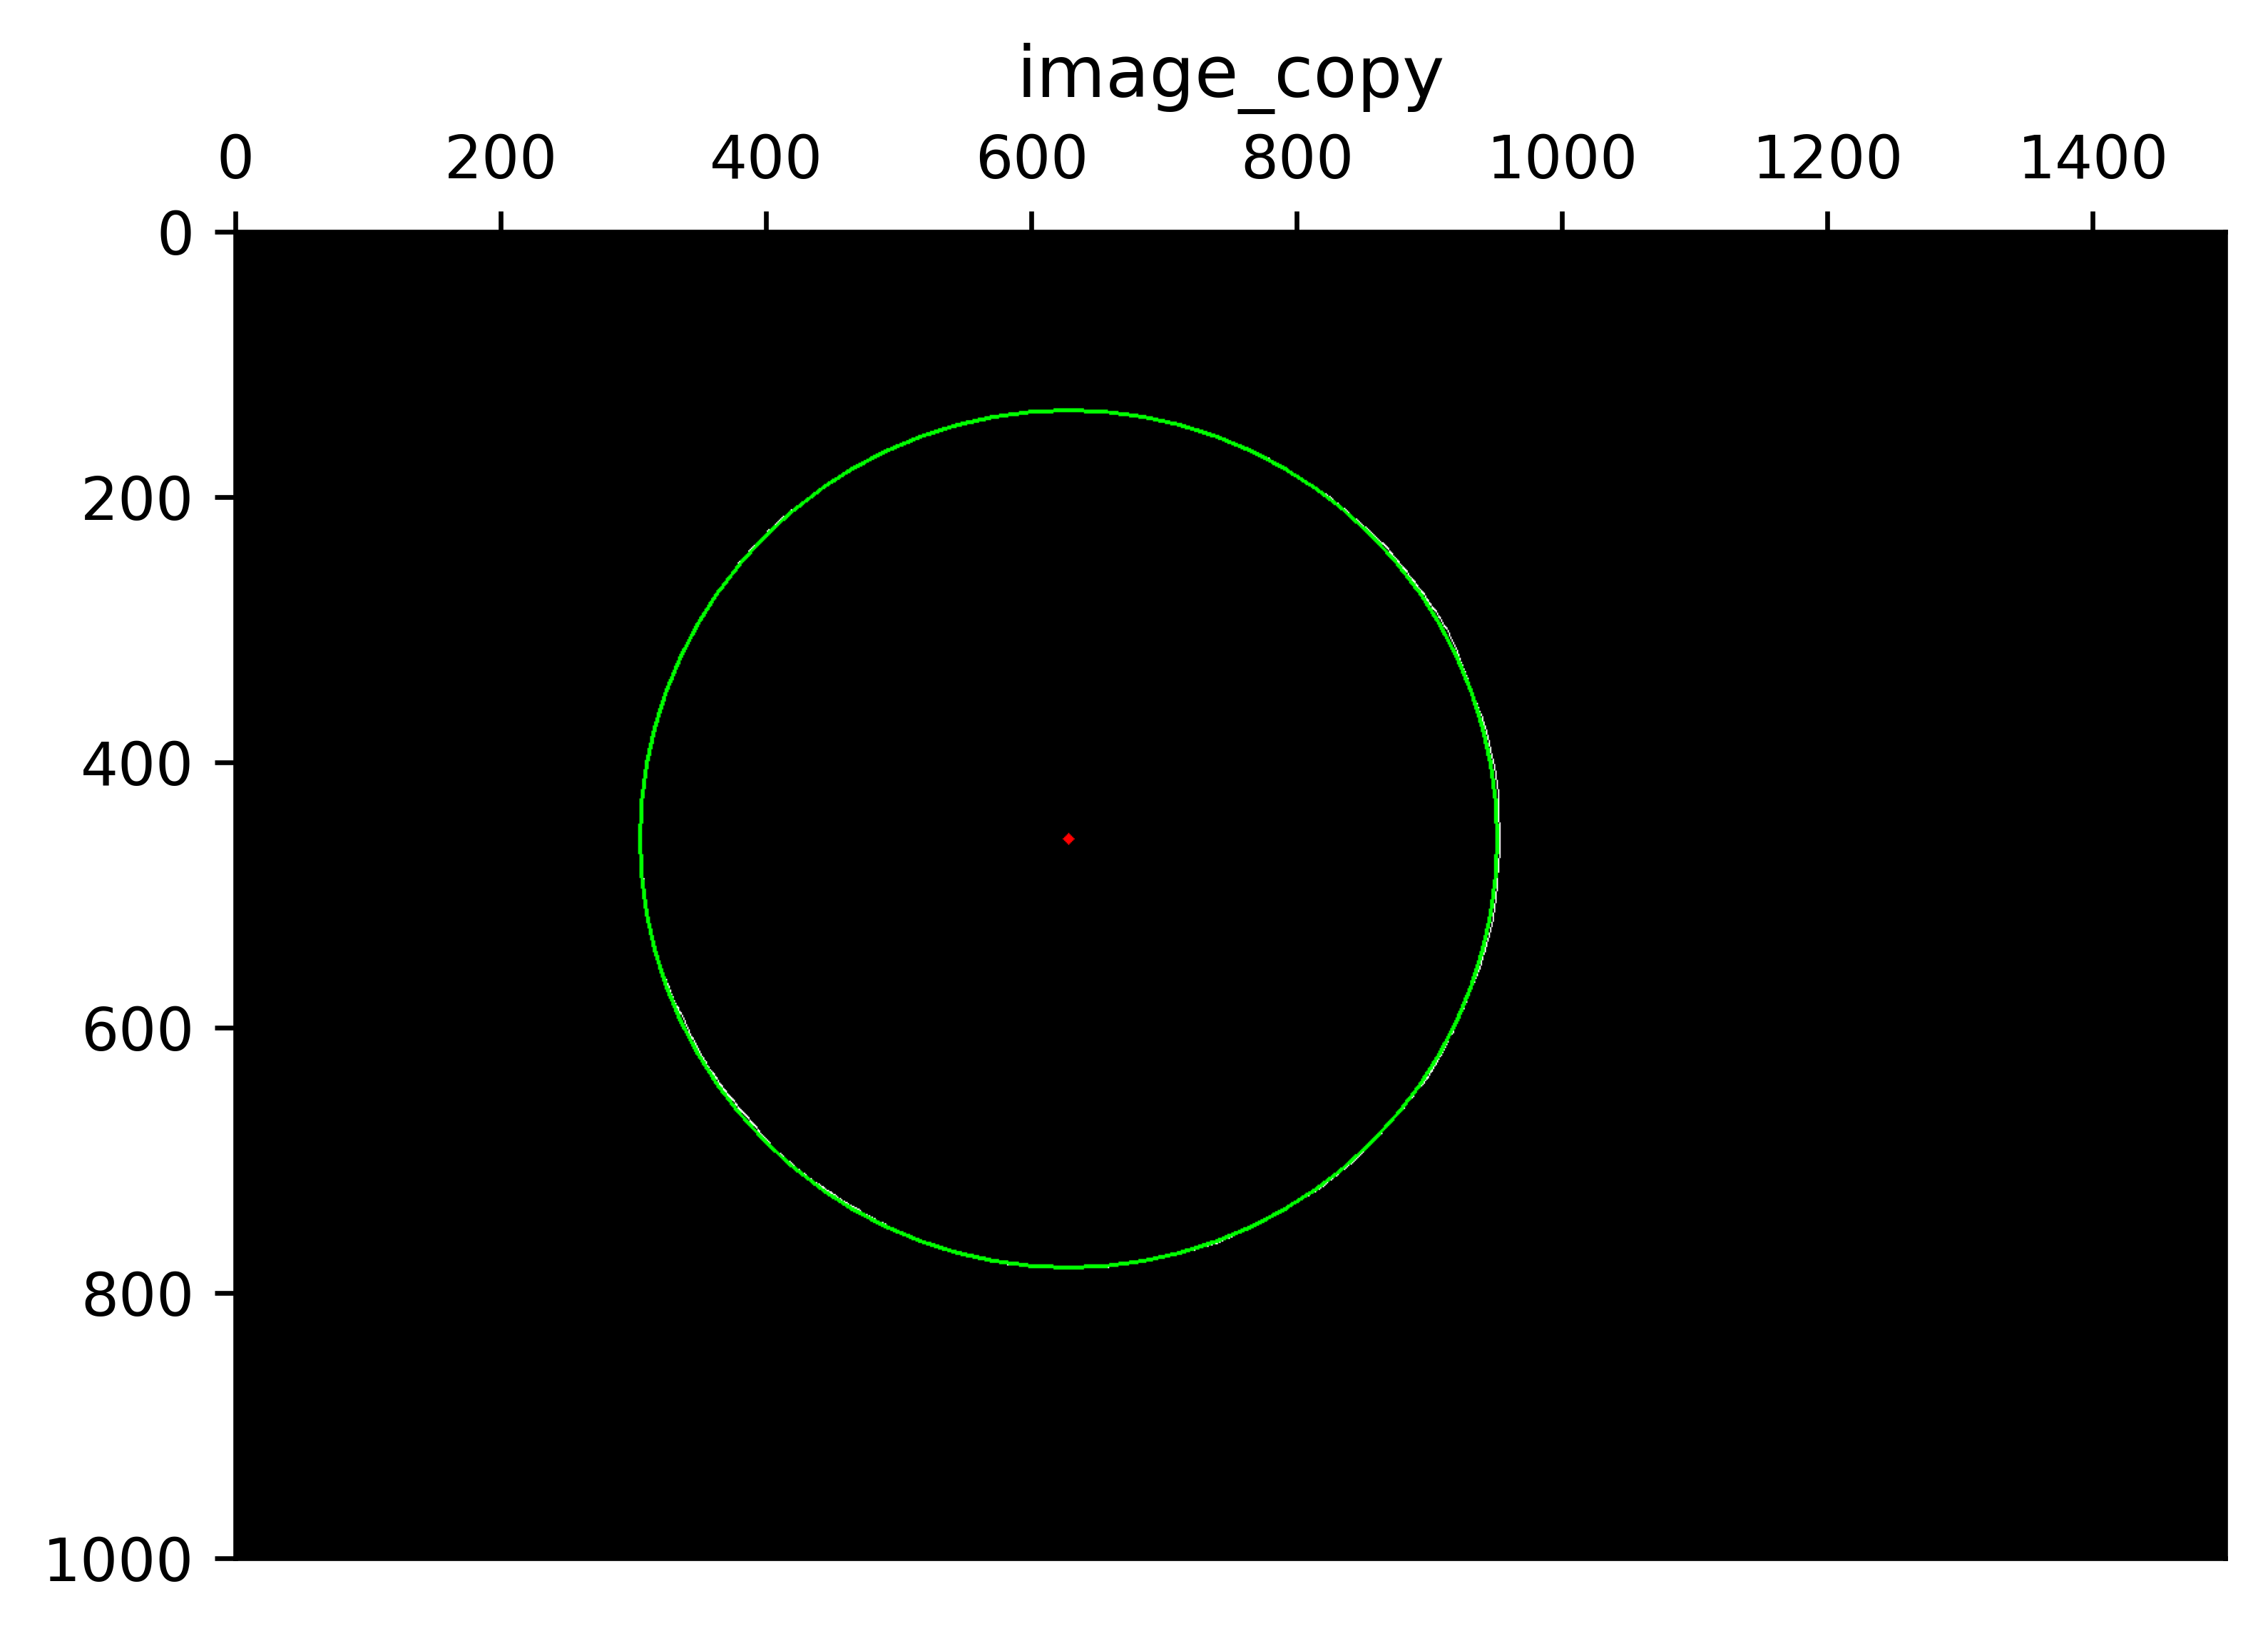

In [127]:
image_copy = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image_copy, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(image_copy, (i[0], i[1]), 2, (0, 0, 255), 3)

show_image(image_copy, "image_copy")